In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

print(K.tensorflow_backend._get_available_gpus())

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']


In [2]:
datagen = ImageDataGenerator(rescale=1./255)

In [3]:
img_width, img_height = 299, 299
input_shape = (img_width, img_height, 3)

In [4]:
train_data_dir = './train'
validation_data_dir = './validation'
nb_train_samples = 3262
nb_validation_samples = 2051
epochs = 5
batch_size = 4

In [5]:
# Architecture is inspired by VGG-11
model = Sequential()
# 1
model.add(Conv2D(32, (3,3), padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 2
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3
model.add(Dropout(0.5))
model.add(Conv2D(96, (3,3), padding='same'))
model.add(Activation('relu'))
# 4
model.add(Dropout(0.5))
model.add(Conv2D(96, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 5
model.add(Dropout(0.5))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# 1
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
# 2
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
# 3
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  brightness_range=(1,5),
                                  rotation_range=30)

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 436 images belonging to 2 classes.


In [10]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 100 images belonging to 2 classes.


In [11]:
#model.load_weights('baseline.h5')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps= nb_validation_samples // batch_size)

#model.save_weights('.\baseline.h5') <-- Do Next

Epoch 1/10
815/815 [==============================] - 76s 93ms/step - loss: 0.7673 - acc: 0.4834 - val_loss: 0.6932 - val_acc: 0.5005
Epoch 2/10
815/815 [==============================] - 74s 90ms/step - loss: 0.6938 - acc: 0.4933 - val_loss: 0.6932 - val_acc: 0.4995
Epoch 3/10
815/815 [==============================] - 74s 90ms/step - loss: 0.6936 - acc: 0.5071 - val_loss: 0.6933 - val_acc: 0.5015
Epoch 4/10
815/815 [==============================] - 74s 91ms/step - loss: 0.6957 - acc: 0.5025 - val_loss: 0.6933 - val_acc: 0.5020
Epoch 5/10
815/815 [==============================] - 74s 90ms/step - loss: 0.6941 - acc: 0.5064 - val_loss: 0.6932 - val_acc: 0.5015
Epoch 6/10
815/815 [==============================] - 74s 90ms/step - loss: 0.6941 - acc: 0.4871 - val_loss: 0.6933 - val_acc: 0.4995
Epoch 7/10
815/815 [==============================] - 75s 92ms/step - loss: 0.6937 - acc: 0.4994 - val_loss: 0.6932 - val_acc: 0.4995
Epoch 8/10
815/815 [==============================] - 74s 90ms

In [12]:
#model.save_weights()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 299, 299, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 299, 299, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 149, 149, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 149, 149, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 64)        0         
__________

In [13]:
#history.history['val_acc']

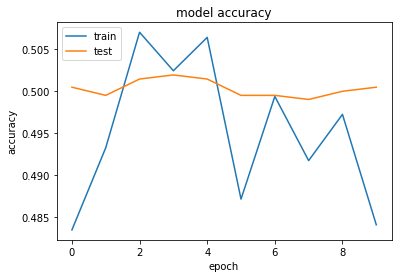

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()